<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QFT_05_Claude_mkbahk_20250423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-h3smmjlh
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-h3smmjlh
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [64]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np
#import matplotlib.pyplot as plt

In [123]:
# QFT를 수행하는 함수 정의
def qft(circuit, q, n):
    """
    n-qubit QFT on q in circuit

    Args:
        circuit (QuantumCircuit): 양자 회로
        q (list): 큐비트 리스트
        n (int): 큐비트 수
    """
    # QFT 알고리즘 구현
    for j in range(n):
        circuit.h(q[j])
        for k in range(j+1, n):
            # Controlled-phase rotation
            circuit.cp(np.pi/float(2**(k-j)), q[k], q[j])
        ###for
    ###for

    # 큐비트 순서 뒤집기 (swap)
    for i in range(n//2):
        circuit.swap(q[i], q[n-i-1])
    ###for

    return circuit
###def

In [125]:
# 3 큐비트 회로 생성
n = 3
qc = QuantumCircuit(n, n)

# |001> 상태 준비 (첫 번째 큐비트만 |1> 상태로 설정)
qc.x(0)

# 회로에 대한 정보 출력
print("Initial state |001>:")
print(qc.draw())


Initial state |001>:
     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
c: 3/═════
          


In [126]:
# QFT 적용
qft(qc, list(range(n)), n)

# 회로에 대한 정보 출력
print("\nAfter QFT:")
print(qc.draw())


After QFT:
     ┌───┐┌───┐                                        
q_0: ┤ X ├┤ H ├─■────────■───────────────────────────X─
     └───┘└───┘ │P(π/2)  │       ┌───┐               │ 
q_1: ───────────■────────┼───────┤ H ├─■─────────────┼─
                         │P(π/4) └───┘ │P(π/2) ┌───┐ │ 
q_2: ────────────────────■─────────────■───────┤ H ├─X─
                                               └───┘   
c: 3/══════════════════════════════════════════════════
                                                       


In [140]:
# 측정 추가
qc.measure(range(n), range(n))

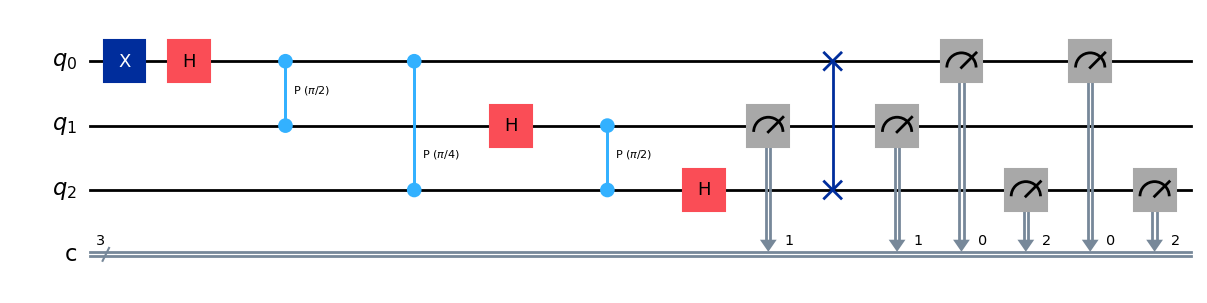

In [141]:
qc.draw("mpl")

In [130]:
# 시뮬레이터로 실행
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts(qc)

# 결과 시각화
print("\n측정 결과 분포:")
print(counts)


측정 결과 분포:
{'100': 107, '111': 147, '011': 128, '110': 115, '101': 122, '010': 122, '000': 153, '001': 130}


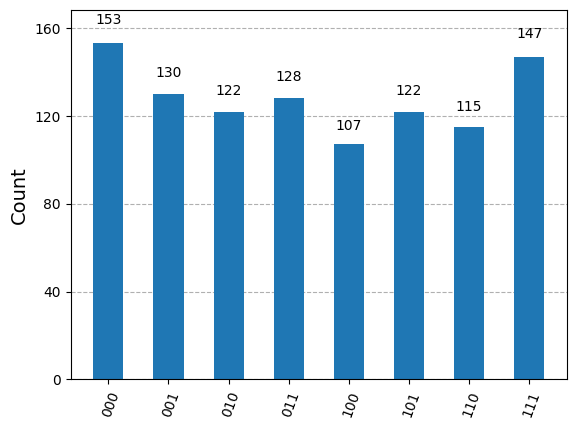

In [131]:
plot_histogram(counts)

In [132]:
# 추가: 상태벡터 시뮬레이터를 사용하여 QFT 후의 상태 확인
qc_sv = QuantumCircuit(n)
qc_sv.x(0)  # |001> 준비
qft(qc_sv, list(range(n)), n)  # QFT 적용

# 상태벡터 시뮬레이터 실행
sv_sim = Aer.get_backend('statevector_simulator')
sv_result =  sv_sim.run(qc_sv).result()
statevector = sv_result.get_statevector()

print("\nQFT 후 상태벡터:")
print(statevector)



QFT 후 상태벡터:
Statevector([ 0.35355339-4.32978028e-17j,  0.35355339-4.32978028e-17j,
              0.35355339-4.32978028e-17j,  0.35355339-4.32978028e-17j,
             -0.35355339+4.32978028e-17j, -0.35355339+4.32978028e-17j,
             -0.35355339+4.32978028e-17j, -0.35355339+4.32978028e-17j],
            dims=(2, 2, 2))


In [134]:
# 확률 진폭 출력
print("\n각 기저 상태의 확률 진폭:")
for i, amplitude in enumerate(statevector):
    bin_i = format(i, f'0{n}b')
    print(f"|{bin_i}> : {amplitude}")
###for


각 기저 상태의 확률 진폭:
|000> : (0.3535533905932738-4.329780281177467e-17j)
|001> : (0.35355339059327373-4.329780281177466e-17j)
|010> : (0.35355339059327373-4.329780281177466e-17j)
|011> : (0.3535533905932737-4.329780281177465e-17j)
|100> : (-0.35355339059327384+4.3297802811774677e-17j)
|101> : (-0.3535533905932738+4.329780281177467e-17j)
|110> : (-0.3535533905932738+4.329780281177467e-17j)
|111> : (-0.35355339059327373+4.329780281177466e-17j)


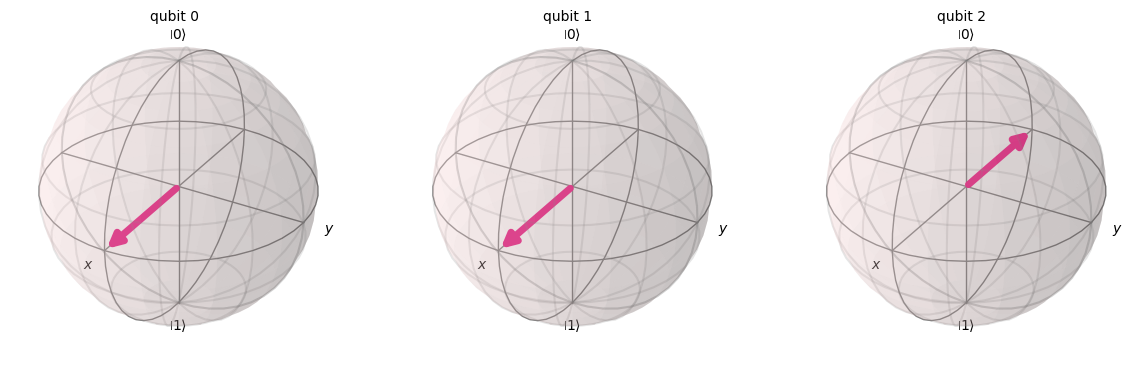

In [135]:
# 블로흐 구면에 상태 표현 (선택적)
plot_bloch_multivector(statevector)
#plt.show()

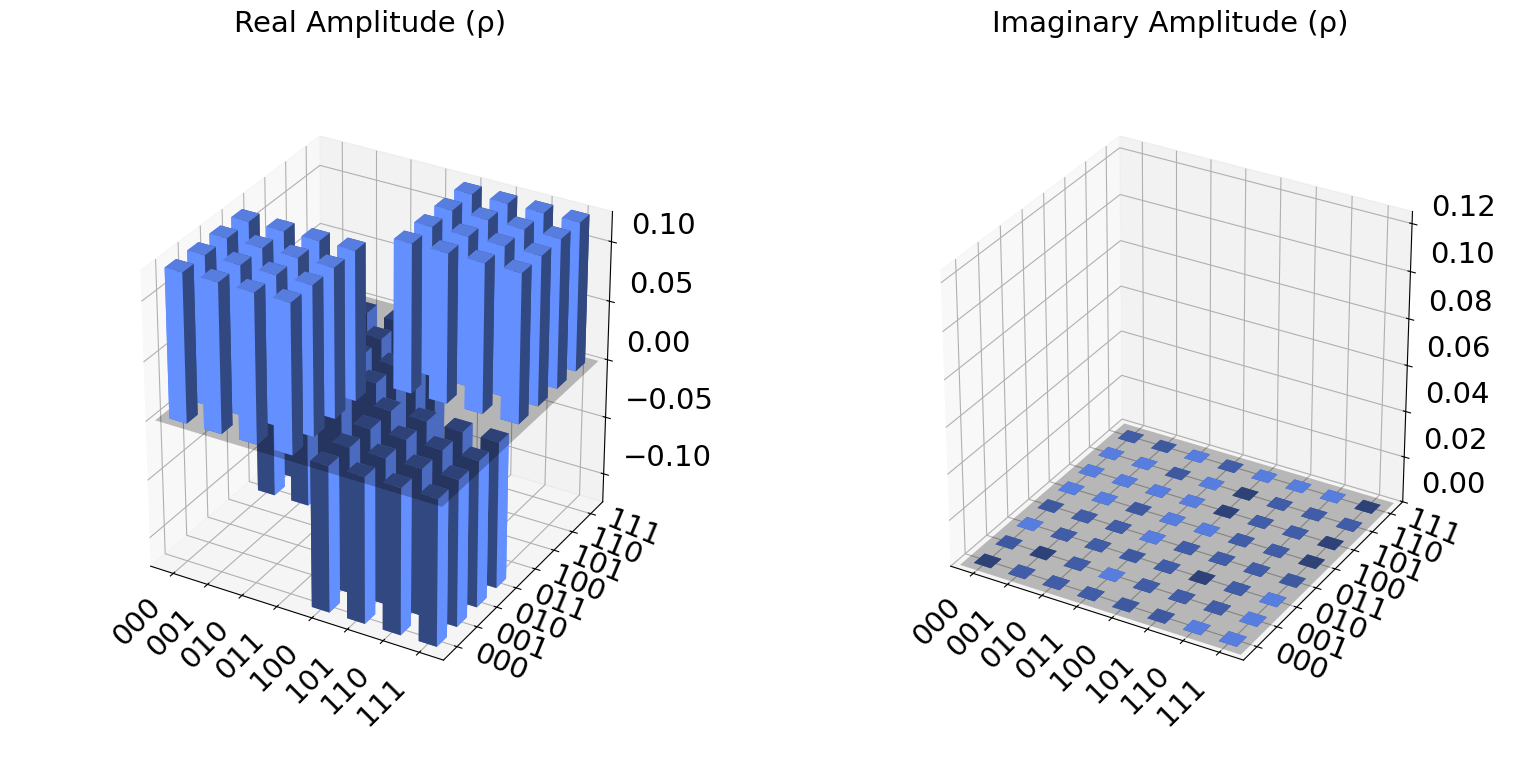

In [137]:
plot_state_city(statevector)

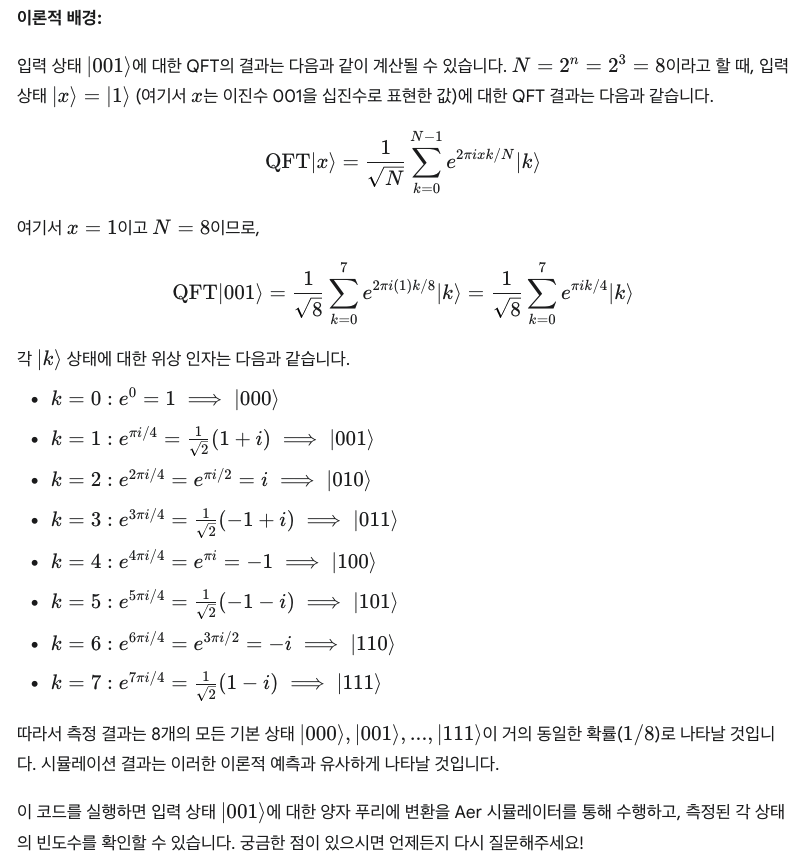